In [179]:
# importar paquetes a ocupar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.classification import *
from sklearn.model_selection import train_test_split
import zipfile
import os

In [180]:
# Recomendaciones para mejorar el accuracy del modelo ML:

# Utilice una mayor cantidad de datos de entrenamiento.
# Utilice un conjunto de datos de prueba más grande.
# Utilice técnicas de regularización para prevenir el sobreajuste.
# Utilice técnicas de procesamiento de características, como la selección de características y la normalización.
# Utilice algoritmos de aprendizaje automático más avanzados y complejos, como redes neuronales.
# Utilice una técnica de ensembling para combinar varios modelos.
# Utilice una técnica de aprendizaje por refuerzo para ajustar los parámetros del modelo.
# Utilice una técnica de validación cruzada para evaluar el rendimiento del modelo.
# Utilice una técnica de transferencia de aprendizaje para transferir el conocimiento de un problema relacionado al problema actual.
# Utilice un conjunto de datos de entrenamiento balanceado para prevenir el sesgo en el modelo.

In [181]:
# importar archivos csv# Abrir el archivo comprimido
with zipfile.ZipFile('datasets/teams/battlelog_teams.zip', 'r') as zip_ref:
    # Extraer el archivo CSV
    zip_ref.extractall('datasets/teams/')

crossBattlelog = pd.read_csv('datasets/teams/battlelog_teams.csv', index_col=0)

os.remove('datasets/teams/battlelog_teams.csv')

crossBattlelog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326998 entries, 0 to 326997
Data columns (total 63 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   battleTime                             326998 non-null  object 
 1   playertag                              326998 non-null  object 
 2   event.id                               326998 non-null  int64  
 3   event.mode                             326998 non-null  object 
 4   event.map                              326998 non-null  object 
 5   battle.mode                            326998 non-null  object 
 6   battle.type                            326998 non-null  object 
 7   battle.result                          326998 non-null  object 
 8   battle.duration                        326998 non-null  float64
 9   battle.trophyChange                    239062 non-null  float64
 10  battle.starPlayer.tag                  271065 non-null  

In [182]:
# importar archivos csv
players = pd.read_csv('datasets/players/players.csv', index_col=0)
players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86013 entries, 0 to 86012
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   tag                                   86013 non-null  object 
 1   name                                  86012 non-null  object 
 2   nameColor                             83567 non-null  object 
 3   icon                                  5371 non-null   object 
 4   trophies                              86013 non-null  int64  
 5   highestTrophies                       86013 non-null  int64  
 6   highestPowerPlayPoints                62845 non-null  float64
 7   expLevel                              86013 non-null  int64  
 8   expPoints                             86013 non-null  int64  
 9   isQualifiedFromChampionshipChallenge  86013 non-null  bool   
 10  3vs3Victories                         86013 non-null  int64  
 11  soloVictories  

In [183]:
# importar archivos csv
brawlers = pd.read_csv('datasets/brawlers/brawlers_stats.csv', index_col=0)
brawlers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 0 to 63
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              64 non-null     int64  
 1   name            64 non-null     object 
 2   starPowers      64 non-null     object 
 3   gadgets         64 non-null     object 
 4   Brawler         64 non-null     object 
 5   Health          64 non-null     float64
 6   Rarity          64 non-null     object 
 7   Class           64 non-null     object 
 8   Movement_Speed  64 non-null     object 
 9   Range           63 non-null     object 
 10  Reload          63 non-null     object 
 11  Speed_Num       64 non-null     int64  
 12  Range_Num       64 non-null     float64
 13  Reload_Num      63 non-null     float64
 14  Role            64 non-null     object 
dtypes: float64(3), int64(2), object(10)
memory usage: 8.0+ KB


In [184]:
bushList = pd.read_csv('datasets/maps/bushList.csv', index_col=0)
waterList = pd.read_csv('datasets/maps/waterList.csv', index_col=0)
barrierList = pd.read_csv('datasets/maps/barrierList.csv', index_col=0)

In [185]:
# crear columna playerteam
for i in range(len(crossBattlelog)):
	if any(crossBattlelog.loc[i, 'playertag'] == tag for tag in [crossBattlelog.loc[i, 'battle.team1.player1.tag'], crossBattlelog.loc[i, 'battle.team1.player2.tag'], crossBattlelog.loc[i, 'battle.team1.player3.tag']]):
		crossBattlelog.loc[i, 'player_team'] = 'team1'
	elif any(crossBattlelog.loc[i, 'playertag'] == tag for tag in [crossBattlelog.loc[i, 'battle.team2.player1.tag'], crossBattlelog.loc[i, 'battle.team2.player2.tag'], crossBattlelog.loc[i, 'battle.team2.player3.tag']]):
		crossBattlelog.loc[i, 'player_team'] = 'team2'
	else:
		print("error in team assignation for id " + str(i))

crossBattlelog['player_team'].value_counts()

team1    164405
team2    162593
Name: player_team, dtype: int64

In [186]:
# crear columna winner_team
for i in range(len(crossBattlelog)):
	if crossBattlelog.loc[i, 'battle.result'] == 'draw':
		crossBattlelog.loc[i, 'winner_team'] = 'draw'
	elif crossBattlelog.loc[i, 'player_team'] == 'team1' and crossBattlelog.loc[i, 'battle.result'] == 'victory':
		crossBattlelog.loc[i, 'winner_team'] = 'team1'
	elif crossBattlelog.loc[i, 'player_team'] == 'team1' and crossBattlelog.loc[i, 'battle.result'] == 'defeat':
		crossBattlelog.loc[i, 'winner_team'] = 'team2'
	elif crossBattlelog.loc[i, 'player_team'] == 'team2' and crossBattlelog.loc[i, 'battle.result'] == 'victory':
		crossBattlelog.loc[i, 'winner_team'] = 'team2'
	elif crossBattlelog.loc[i, 'player_team'] == 'team2' and crossBattlelog.loc[i, 'battle.result'] == 'defeat':
		crossBattlelog.loc[i, 'winner_team'] = 'team1'
	else:
		print("error in winner assignation for id " + str(i))

crossBattlelog['winner_team'].value_counts()

team1    164394
team2    160559
draw       2045
Name: winner_team, dtype: int64

In [187]:
# agregar columna identificando batallas levelup y definir subset
# for i in range(len(crossBattlelog)):

# 	t1p1 = crossBattlelog.loc[i, 'battle.team1.player1.brawler.trophies']
# 	t1p2 = crossBattlelog.loc[i, 'battle.team1.player2.brawler.trophies']
# 	t1p3 = crossBattlelog.loc[i, 'battle.team1.player3.brawler.trophies']
# 	t2p1 = crossBattlelog.loc[i, 'battle.team2.player1.brawler.trophies']
# 	t2p2 = crossBattlelog.loc[i, 'battle.team2.player2.brawler.trophies']
# 	t2p3 = crossBattlelog.loc[i, 'battle.team2.player3.brawler.trophies']

# 	if  (t1p1 <= 350 or t1p2 <= 350 or t1p3 <= 350 or t2p1 <= 350 or t2p2 <= 350 or t2p3 <= 350):
# 		crossBattlelog.loc[i, 'low_trophy'] = 'y'
# 	else:
# 		crossBattlelog.loc[i, 'low_trophy'] = 'n'

# crossBattlelog = crossBattlelog[crossBattlelog['low_trophy'] == 'n'].reset_index(drop=True)

# crossBattlelog.shape

In [188]:
# format date
# for i, battleTime in enumerate(crossBattlelog['battleTime']):
# 	crossBattlelog.loc[i, 'battleTime'] = pd.to_datetime(crossBattlelog.loc[i, 'battleTime'])
# crossBattlelog['battleTime']

In [189]:
# eliminar draws, no aportan al modelo
crossBattlelog = crossBattlelog[crossBattlelog['winner_team'] != 'draw'].reset_index(drop=True)

In [190]:
# crear columna winner
def clean_winner(team):

	dfw = crossBattlelog[crossBattlelog['player_team'] == team].reset_index(drop = True)

	for i, winner_team in enumerate(dfw['winner_team']):
		if winner_team == 'draw':
			winner = 'd'
		elif winner_team == team:
			winner = 'y'
		else:
			winner = 'n'
		
		dfw.loc[i, 'winner'] = winner

	dfw = dfw.drop('winner_team', axis=1)

	dfw = dfw.rename(columns={
		'battle.' + team + '.player1.tag': 'battle.player1.tag'
		,'battle.' + team + '.player1.brawler.name': 'battle.player1.brawler.name'
		,'battle.' + team + '.player1.brawler.power': 'battle.player1.brawler.power'
		,'battle.' + team + '.player1.brawler.trophies': 'battle.player1.brawler.trophies'
		,'battle.' + team + '.player2.tag': 'battle.player2.tag'
		,'battle.' + team + '.player2.brawler.name': 'battle.player2.brawler.name'
		,'battle.' + team + '.player2.brawler.power': 'battle.player2.brawler.power'
		,'battle.' + team + '.player2.brawler.trophies': 'battle.player2.brawler.trophies'
		,'battle.' + team + '.player3.tag': 'battle.player3.tag'
		,'battle.' + team + '.player3.brawler.name': 'battle.player3.brawler.name'
		,'battle.' + team + '.player3.brawler.power': 'battle.player3.brawler.power'
		,'battle.' + team + '.player3.brawler.trophies': 'battle.player3.brawler.trophies'
	})

	dfw = dfw[[	
		'battleTime'
		,'event.mode'
		,'event.map'
		,'battle.type'
		,'battle.duration'
		,'battle.trophyChange'
		,'battle.starPlayer.tag'
 		,'battle.starPlayer.brawler.name'
 		,'battle.starPlayer.brawler.power'
 		,'battle.starPlayer.brawler.trophies'
		,'battle.player1.tag'
		,'battle.player1.brawler.name'
		,'battle.player1.brawler.power'
		,'battle.player1.brawler.trophies'
		,'battle.player2.tag'
		,'battle.player2.brawler.name'
		,'battle.player2.brawler.power'
		,'battle.player2.brawler.trophies'
		,'battle.player3.tag'
		,'battle.player3.brawler.name'
		,'battle.player3.brawler.power'
		,'battle.player3.brawler.trophies'
		,'winner'
	]]

	if team == 'team1':
		oteam = 'team2'
	else:
		oteam = 'team1'
	
	dfl = crossBattlelog[crossBattlelog['player_team'] == team].reset_index(drop = True)

	for i, winner_team in enumerate(dfl['winner_team']):
		if winner_team == 'draw':
			winner = 'd'
		elif winner_team == oteam:
			winner = 'y'
		else:
			winner = 'n'
		
		dfl.loc[i, 'winner'] = winner

	dfl = dfl.drop('winner_team', axis=1)

	dfl = dfl.rename(columns={
		'battle.' + oteam + '.player1.tag': 'battle.player1.tag'
		,'battle.' + oteam + '.player1.brawler.name': 'battle.player1.brawler.name'
		,'battle.' + oteam + '.player1.brawler.power': 'battle.player1.brawler.power'
		,'battle.' + oteam + '.player1.brawler.trophies': 'battle.player1.brawler.trophies'
		,'battle.' + oteam + '.player2.tag': 'battle.player2.tag'
		,'battle.' + oteam + '.player2.brawler.name': 'battle.player2.brawler.name'
		,'battle.' + oteam + '.player2.brawler.power': 'battle.player2.brawler.power'
		,'battle.' + oteam + '.player2.brawler.trophies': 'battle.player2.brawler.trophies'
		,'battle.' + oteam + '.player3.tag': 'battle.player3.tag'
		,'battle.' + oteam + '.player3.brawler.name': 'battle.player3.brawler.name'
		,'battle.' + oteam + '.player3.brawler.power': 'battle.player3.brawler.power'
		,'battle.' + oteam + '.player3.brawler.trophies': 'battle.player3.brawler.trophies'
	})

	dfl = dfl[[	
		'battleTime'
		,'event.mode'
		,'event.map'
		,'battle.type'
		,'battle.duration'
		,'battle.trophyChange'
		,'battle.starPlayer.tag'
 		,'battle.starPlayer.brawler.name'
 		,'battle.starPlayer.brawler.power'
 		,'battle.starPlayer.brawler.trophies'
		,'battle.player1.tag'
		,'battle.player1.brawler.name'
		,'battle.player1.brawler.power'
		,'battle.player1.brawler.trophies'
		,'battle.player2.tag'
		,'battle.player2.brawler.name'
		,'battle.player2.brawler.power'
		,'battle.player2.brawler.trophies'
		,'battle.player3.tag'
		,'battle.player3.brawler.name'
		,'battle.player3.brawler.power'
		,'battle.player3.brawler.trophies'
		,'winner'
	]]

	return pd.concat([dfw, dfl], ignore_index=True)

team1 = clean_winner('team1')
team2 = clean_winner('team2')

battlelogProcess = pd.concat([team1, team2], ignore_index=True).reset_index(drop = True)
battlelogProcess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649906 entries, 0 to 649905
Data columns (total 23 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   battleTime                          649906 non-null  object 
 1   event.mode                          649906 non-null  object 
 2   event.map                           649906 non-null  object 
 3   battle.type                         649906 non-null  object 
 4   battle.duration                     649906 non-null  float64
 5   battle.trophyChange                 478080 non-null  float64
 6   battle.starPlayer.tag               538938 non-null  object 
 7   battle.starPlayer.brawler.name      538938 non-null  object 
 8   battle.starPlayer.brawler.power     538938 non-null  float64
 9   battle.starPlayer.brawler.trophies  538938 non-null  float64
 10  battle.player1.tag                  649906 non-null  object 
 11  battle.player1.brawler.nam

In [191]:
battlelogProcess['winner'].value_counts()

n    324953
y    324953
Name: winner, dtype: int64

In [253]:
# agregar brawler stats
battlelogFinal = battlelogProcess

def add_brawlers(df, prefix):
	df = pd.merge(left=df, right=brawlers[['name','Health','Rarity','Class','Movement_Speed','Range','Reload','Speed_Num','Range_Num','Reload_Num','Role']].add_prefix(prefix), on=prefix + 'name', how='left', suffixes=('','_b'))
	return df

battlelogFinal = add_brawlers(battlelogFinal, 'battle.player1.brawler.')
battlelogFinal = add_brawlers(battlelogFinal, 'battle.player2.brawler.')
battlelogFinal = add_brawlers(battlelogFinal, 'battle.player3.brawler.')

battlelogFinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 649906 entries, 0 to 649905
Data columns (total 53 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   battleTime                             649906 non-null  object 
 1   event.mode                             649906 non-null  object 
 2   event.map                              649906 non-null  object 
 3   battle.type                            649906 non-null  object 
 4   battle.duration                        649906 non-null  float64
 5   battle.trophyChange                    478080 non-null  float64
 6   battle.starPlayer.tag                  538938 non-null  object 
 7   battle.starPlayer.brawler.name         538938 non-null  object 
 8   battle.starPlayer.brawler.power        538938 non-null  float64
 9   battle.starPlayer.brawler.trophies     538938 non-null  float64
 10  battle.player1.tag                     649906 non-null  

In [254]:
# agregar map data
battlelogFinal = battlelogFinal.merge(barrierList, how='left', on='event.map')
battlelogFinal = battlelogFinal.merge(bushList, how='left', on='event.map')
battlelogFinal = battlelogFinal.merge(waterList, how='left', on='event.map')
battlelogFinal['waterProp'] = battlelogFinal['waterProp'].fillna(0)
battlelogFinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 649906 entries, 0 to 649905
Data columns (total 58 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   battleTime                             649906 non-null  object 
 1   event.mode                             649906 non-null  object 
 2   event.map                              649906 non-null  object 
 3   battle.type                            649906 non-null  object 
 4   battle.duration                        649906 non-null  float64
 5   battle.trophyChange                    478080 non-null  float64
 6   battle.starPlayer.tag                  538938 non-null  object 
 7   battle.starPlayer.brawler.name         538938 non-null  object 
 8   battle.starPlayer.brawler.power        538938 non-null  float64
 9   battle.starPlayer.brawler.trophies     538938 non-null  float64
 10  battle.player1.tag                     649906 non-null  

In [ ]:
# crear columna battle brawlers
# def create_list_name(row, column):
#     return [str(row['battle.player1.brawler.' + column]), str(row['battle.player2.brawler.' + column]), str(row['battle.player3.brawler.' + column])]

# battlelogFinal['battle.brawlers'] = battlelogFinal.apply(lambda row: create_list_name(row, 'name'), axis=1)
# battlelogFinal['battle.brawlers'] = [str(sorted(roles)) for roles in battlelogFinal['battle.brawlers']]

# battlelogFinal['battle.brawlers']

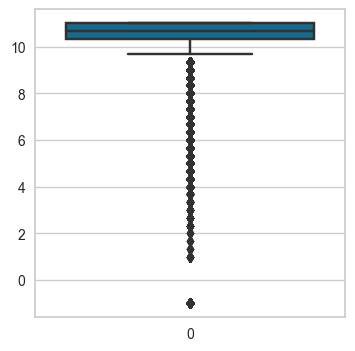

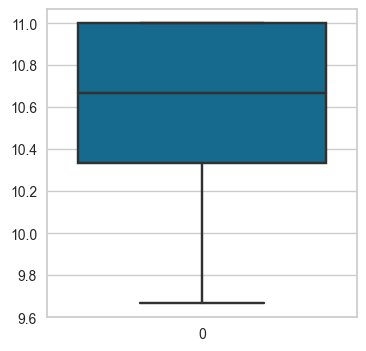

In [255]:
# crear columna avg power
def create_avg(row, column):
    return (row['battle.player1.brawler.'+ column] + row['battle.player2.brawler.'+ column] + row['battle.player3.brawler.'+ column]) / 3

battlelogFinal['battle.avgpower'] = battlelogFinal.apply(lambda row: create_avg(row, 'power'), axis=1)

plt.figure(figsize=(4,4))
sns.boxplot(battlelogFinal['battle.avgpower'])
plt.show()

battlelogFinal = battlelogFinal[battlelogFinal['battle.avgpower'] > 9.5].reset_index(drop=True)
plt.figure(figsize=(4,4))
sns.boxplot(battlelogFinal['battle.avgpower'])
plt.show()

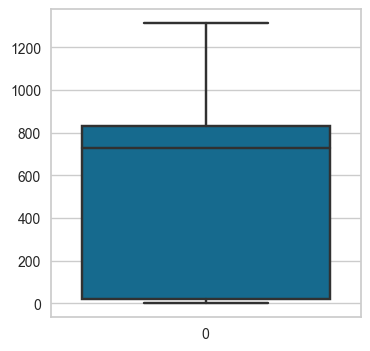

In [260]:
# crear columna avg trophies
battlelogFinal['battle.avgtrophies'] = battlelogFinal.apply(lambda row: create_avg(row, 'trophies'), axis=1)
plt.figure(figsize=(4,4))
sns.boxplot(battlelogFinal['battle.avgtrophies'])
plt.show()

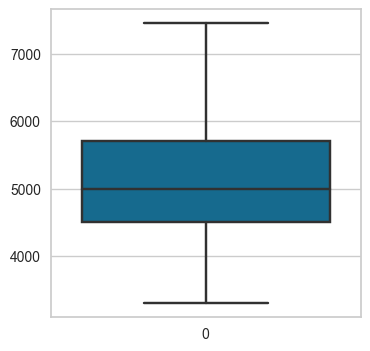

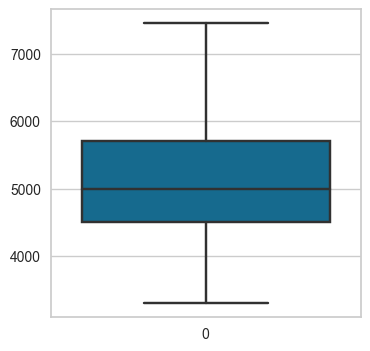

In [261]:
# crear columna avg health
battlelogFinal['battle.avghealth'] = battlelogFinal.apply(lambda row: create_avg(row, 'Health'), axis=1).reset_index(drop=True)
plt.figure(figsize=(4,4))
sns.boxplot(battlelogFinal['battle.avghealth'])
plt.show()

battlelogFinal = battlelogFinal[battlelogFinal['battle.avghealth'] < 7500].reset_index(drop=True)
plt.figure(figsize=(4,4))
sns.boxplot(battlelogFinal['battle.avghealth'])
plt.show()

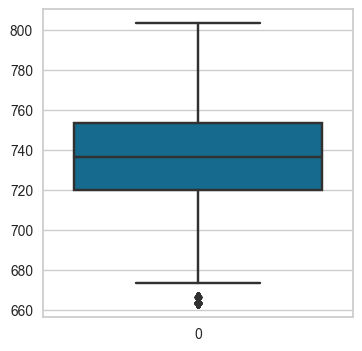

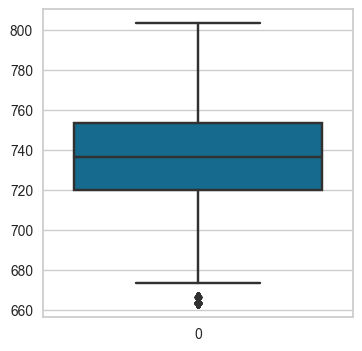

In [262]:
# crear columna avg speed
battlelogFinal['battle.avgspeed'] = battlelogFinal.apply(lambda row: create_avg(row, 'Speed_Num'), axis=1)
plt.figure(figsize=(4,4))
sns.boxplot(battlelogFinal['battle.avgspeed'])
plt.show()

battlelogFinal = battlelogFinal[(battlelogFinal['battle.avgspeed'] >= 660) & (battlelogFinal['battle.avgspeed'] <= 810)].reset_index(drop=True)
plt.figure(figsize=(4,4))
sns.boxplot(battlelogFinal['battle.avgspeed'])
plt.show()

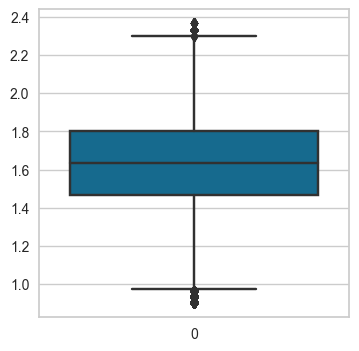

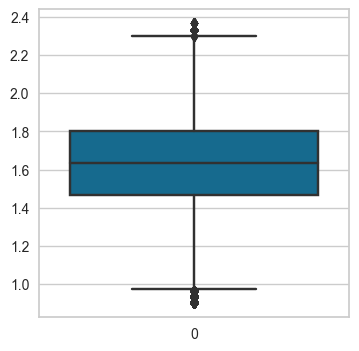

In [263]:
# crear columna avg reload
battlelogFinal['battle.avgreload'] = battlelogFinal.apply(lambda row: create_avg(row, 'Reload_Num'), axis=1)
plt.figure(figsize=(4,4))
sns.boxplot(battlelogFinal['battle.avgreload'])
plt.show()

battlelogFinal = battlelogFinal[battlelogFinal['battle.avgreload'] >= 0.9].reset_index(drop=True)
plt.figure(figsize=(4,4))
sns.boxplot(battlelogFinal['battle.avgreload'])
plt.show()

In [265]:
battlelog = battlelogFinal[[                             
'event.mode'
,'event.map'
,'battle.type'
,'winner'
,'barriers'
,'barriers_center'
,'bushes'
,'bushes_center'
,'waterProp'
,'battle.player1.brawler.name'
,'battle.player2.brawler.name'
,'battle.player3.brawler.name'
,'battle.player1.brawler.Class'
,'battle.player2.brawler.Class'
,'battle.player3.brawler.Class'
,'battle.player1.brawler.Movement_Speed'
,'battle.player2.brawler.Movement_Speed'
,'battle.player3.brawler.Movement_Speed'
,'battle.player1.brawler.Role'
,'battle.player2.brawler.Role'
,'battle.player3.brawler.Role'
,'battle.avgpower'
,'battle.avgtrophies'
,'battle.avghealth'
,'battle.avgspeed'
,'battle.avgreload'
]]

battlelog.head()

,event.mode,event.map,battle.type,winner,barriers,barriers_center,bushes,bushes_center,waterProp,battle.player1.brawler.name,...,battle.player2.brawler.Movement_Speed,battle.player3.brawler.Movement_Speed,battle.player1.brawler.Role,battle.player2.brawler.Role,battle.player3.brawler.Role,battle.avgpower,battle.avgtrophies,battle.avghealth,battle.avgspeed,battle.avgreload
0,hotZone,Dueling Beetles,ranked,n,62,18,47,22,0.070509,MANDY,...,Normal,Normal,sniper,assassin,assassin,11.0,501.666667,4550.0,720.000000,1.500000
1,hotZone,Ring of Fire,soloRanked,y,16,0,114,17,0.027346,MORTIS,...,Normal,Fast,assassin,assassin,tank,11.0,17.000000,4750.0,770.000000,1.733333
2,hotZone,Ring of Fire,soloRanked,y,16,0,114,17,0.027346,MORTIS,...,Normal,Fast,assassin,assassin,tank,11.0,17.000000,4750.0,770.000000,1.733333
3,knockout,Goldarm Gulch,soloRanked,y,74,32,123,12,0.038716,FANG,...,Normal,Normal,assassin,sniper,ranged dps,11.0,17.000000,4750.0,736.666667,1.433333
4,knockout,Goldarm Gulch,soloRanked,n,74,32,123,12,0.038716,FANG,...,Normal,Normal,assassin,sniper,ranged dps,11.0,17.000000,4750.0,736.666667,1.433333


In [268]:
# generar set de testing y training
seed=1461

train, test = train_test_split(battlelog, test_size = 0.6, random_state=seed, stratify=battlelog['winner'])
train.shape

(213387, 26)

In [269]:
# setup model
session_1 = setup(
	data = train, 
	target = 'winner', 
	fix_imbalance = True,
    feature_selection= True,
    use_gpu=True)

,Description,Value
0,session_id,7378
1,Target,winner
2,Target Type,Binary
3,Label Encoded,"n: 0, y: 1"
4,Original Data,"(213387, 26)"
5,Missing Values,False
6,Numeric Features,10
7,Categorical Features,15
8,Ordinal Features,False
9,High Cardinality Features,False


In [270]:
#comparación de modelos
models = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6007,0.6485,0.5591,0.6150,0.5857,0.2020,0.2029,42.0260
gbc,Gradient Boosting Classifier,0.5941,0.6404,0.5047,0.6204,0.5566,0.1896,0.1930,225.3620
rf,Random Forest Classifier,0.5929,0.6251,0.5666,0.6030,0.5842,0.1863,0.1866,110.4890
ada,Ada Boost Classifier,0.5869,0.6274,0.4758,0.6180,0.5376,0.1756,0.1805,91.3500
et,Extra Trees Classifier,0.5769,0.6039,0.5610,0.5843,0.5724,0.1540,0.1541,142.4890
lda,Linear Discriminant Analysis,0.5761,0.6072,0.5718,0.5814,0.5766,0.1522,0.1522,60.8740
ridge,Ridge Classifier,0.5760,0.0000,0.5718,0.5814,0.5766,0.1521,0.1522,35.4010
lr,Logistic Regression,0.5579,0.5825,0.5694,0.5613,0.5653,0.1157,0.1157,108.5290
knn,K Neighbors Classifier,0.5561,0.5769,0.5590,0.5604,0.5597,0.1121,0.1121,121.4420
dt,Decision Tree Classifier,0.5546,0.5558,0.5538,0.5594,0.5566,0.1092,0.1092,47.6950


In [ ]:
# evaluate_model
evaluate_model(models)

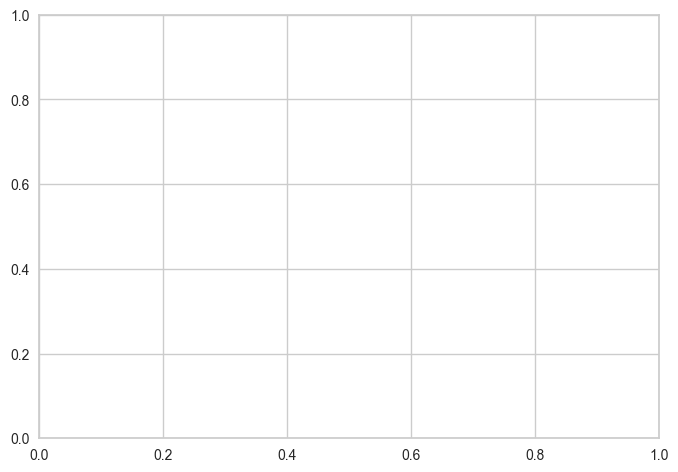

IntProgress(value=0, description='Processing: ', max=4)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:29:47
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


,Fold,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC


In [272]:
# creando modelos para el estimador escogido 
lightgbm = create_model('lightgbm')

In [65]:
# tunear el modelo
lightgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6232,0.6753,0.5679,0.6368,0.6004,0.2461,0.2476
1,0.6169,0.6669,0.5529,0.6323,0.5899,0.2336,0.2354
2,0.6260,0.6804,0.5507,0.6464,0.5948,0.2516,0.2544
3,0.6162,0.6728,0.5633,0.6282,0.5940,0.2322,0.2334
4,0.6141,0.6687,0.5594,0.6263,0.5910,0.2278,0.2291
5,0.6143,0.6607,0.5618,0.6259,0.5922,0.2283,0.2295
6,0.6216,0.6676,0.5826,0.6303,0.6055,0.2431,0.2438
7,0.6225,0.6783,0.5661,0.6362,0.5991,0.2447,0.2462
8,0.6209,0.6696,0.5789,0.6302,0.6035,0.2416,0.2424


In [66]:
#finalizar modelo
model = finalize_model(lightgbm)
predictions = predict_model(model, data = test)

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0,0.6769,0,0,0,0,0


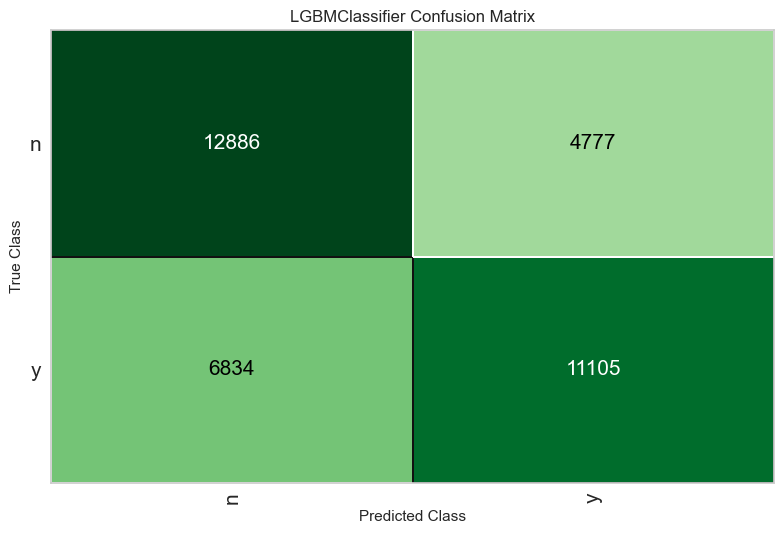

In [ ]:
plot_model(model, plot='confusion_matrix')

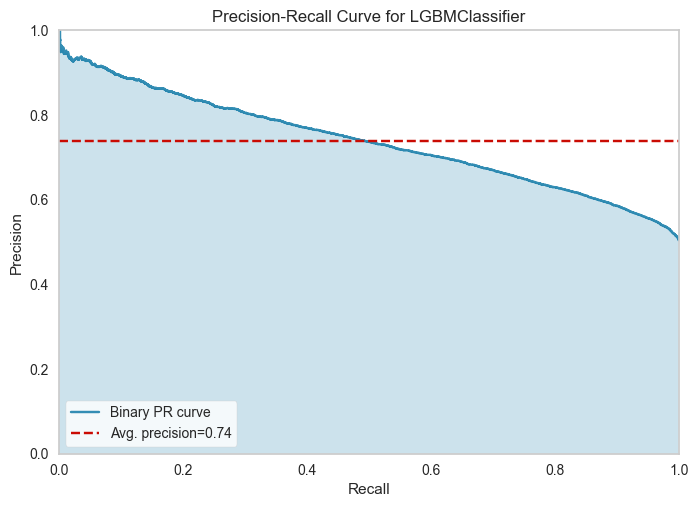

In [68]:
plot_model(model, 'pr')

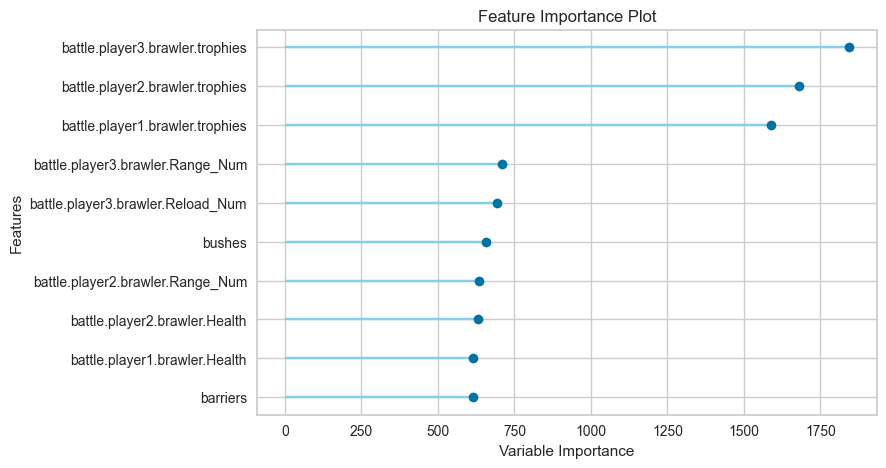

In [75]:
plot_model(model, 'feature')

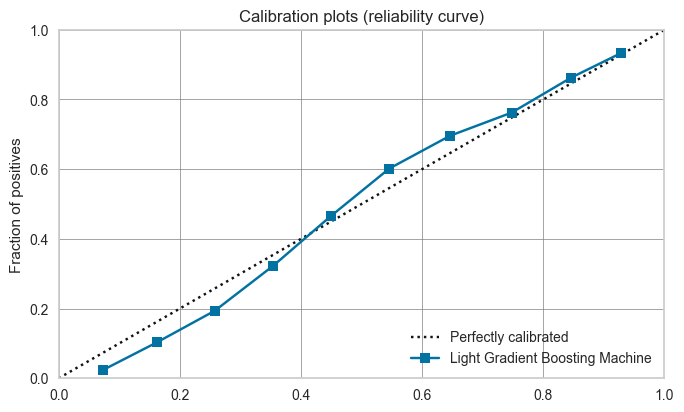

In [69]:
plot_model(model, 'calibration')

In [70]:
print(model)

LGBMClassifier(bagging_fraction=0.5, bagging_freq=6, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, device='gpu',
               feature_fraction=0.4, importance_type='split',
               learning_rate=0.05, max_depth=-1, min_child_samples=61,
               min_child_weight=0.001, min_split_gain=0.3, n_estimators=270,
               n_jobs=-1, num_leaves=70, objective=None, random_state=3339,
               reg_alpha=1e-07, reg_lambda=2, silent='warn', subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


In [71]:
save_model(model, 'models/lightgbm_exp')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='winner',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                                 colsample_bytree=1.0, device='gpu',
                                 feature_fraction=0.4, importance_type='split',
                                 learning_rate=0.05, max_depth=-1,
                                 min_child_samples=61, min

In [73]:
predictions.to_csv('datasets/predictions/predictions_lc.csv')